In [10]:
import asgl
import nibabel as nib
import numpy as np
import os
import pandas as pd 
import glob
from sklearn.linear_model import LinearRegression
from scipy import stats
import plotnine as p9
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import statsmodels.api as sm
from scipy import stats
import import_ipynb
from Predistim_Library import *
import sklearn.preprocessing as skl_pp#import StandardScalerndardScaler
import heapq
import scipy# import stats
import seaborn as sns

from sklearn.metrics import r2_score

In [11]:
np.set_printoptions(precision=3)
#df2 = pd.read_csv(os.path.join(STUDY_PATH,'20211203_T1_R2_QSM_Values_Lat.csv'),index_col=0)

In [21]:
df1_prime = pd.read_excel(os.path.join(STUDY_PATH,'Bio_Ima_Gen_V3_20210205_2.xlsx'),engine='openpyxl',index_col=0)
df1_bis = pd.read_excel(os.path.join(STUDY_PATH,'Bio_Ima_Gen_V3_20210205.xlsx'),engine='openpyxl',index_col=0)

In [22]:
df1=df1_prime.iloc[:,:34].join(df1_bis.iloc[:,34:])

In [23]:
df1_bis.shape

(832, 1114)

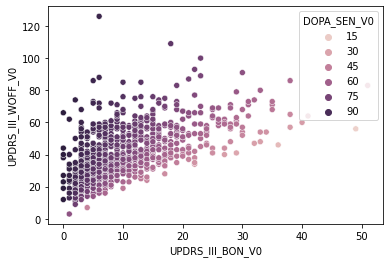

In [24]:
sns.scatterplot(x='UPDRS_III_BON_V0',y='UPDRS_III_WOFF_V0',hue='DOPA_SEN_V0',data=df1)
plt.savefig(os.path.join(STUDY_PATH,'UPDRES_WOFF_BON_DOPA.jpeg'))

In [25]:
df1.rename(columns={'MoCA_TOT _V0':'MoCA_TOT_V0'},inplace=True)
df1.rename(columns={'UPDRS_I _V0':'UPDRS_I_V0'},inplace=True)

In [26]:
TARGET=df1.loc[:,'DOPA_SEN_V0']
TARGET.columns=['DOPA_SEN_V0']
df1.drop(['Centre'], axis=1,inplace=True)
df1.drop(['CQT1'], axis=1,inplace=True)
df1.drop(['CQTE'], axis=1,inplace=True)
#Decommenter la ligne ci-dessous
#df1.drop(['DOPA_SEN_V0'], axis=1,inplace=True)
#df1.drop(['LEDD_TOT_V0_NEW'], axis=1,inplace=True)
df1.insert(4,'LEDD_TOT_V0_NEW',df1.loc[:,'LEDD_TOT_V0'])
df1.drop(['LEDD_TOT_V0'], axis=1,inplace=True)
df1.rename(columns={'LEDD_TOT_V0_NEW':'LEDD_TOT_V0'},inplace=True)
df1.astype({'HY_OFF_V0':np.float64})
df1.astype({'UPDRS_II_OFF_V0':np.float64})
df1.astype({'UPDRS_II_ON_V0':np.float64})
df1.astype({'HY_ON_V0':np.float64})
#df1['HY_OFF_V0'] = [p.replace(',','.') for p in list(df1['HY_OFF_V0'])]
#df1['HY_OFF_V0'].apply(float)

,Age,DIS_DUR_DIAG_V0,BMI,Sexe,LEDD_TOT_V0,UPDRS_III_WOFF_V0,DOPA_SEN_V0,UPDRS_TOT_OFF_V0,HY_OFF_V0,UPDRS_I_V0,...,QSM_ClusterProminence_FrontalSup,QSM_Contrast_FrontalSup,QSM_Correlation_FrontalSup,QSM_InverseVariance_FrontalSup,QSM_JointAverage_FrontalSup,QSM_JointEnergy_FrontalSup,QSM_JointEntropy_FrontalSup,QSM_MCC_FrontalSup,QSM_MaximumProbability_FrontalSup,QSM_SumSquares_FrontalSup
PatientID,,,,,,,,,,,,,,,,,,,,,
01001SR,67.0,14,25.990903,1.0,1291.500,27.0,51.9,69.0,1.5,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01002TM,59.0,8,27.160494,1.0,2309.000,40.0,97.5,70.0,3.0,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01003SJ,61.0,13,28.731921,1.0,1895.500,49.0,71.4,93.0,2.0,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01004DJ,65.0,14,22.206331,2.0,1470.000,54.0,90.7,54.0,5.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01005LB,65.0,16,28.360352,1.0,1828.750,41.0,85.4,67.0,3.0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20025DA,61.0,11,25.013521,2.0,1733.875,26.0,73.1,61.0,2.5,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20026ME,59.0,6,28.024822,1.0,1363.500,27.0,96.3,65.0,2.0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20027RP,64.0,6,24.618104,1.0,2375.000,34.0,82.4,77.0,2.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df1.groupby(['cluster_SNP'])['DOPA_SEN_V0'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster_SNP,,,,,,,,
1.0,212.0,78.587736,10.675313,48.0,71.875,79.65,85.825,100.0
2.0,229.0,70.382969,15.807460,12.5,60.000,73.30,81.300,100.0
3.0,46.0,64.328261,13.026924,33.3,55.825,65.30,73.750,88.5


<AxesSubplot:xlabel='cluster_SNP', ylabel='DOPA_SEN_V0'>

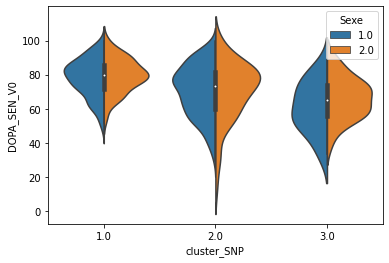

ANOVA 31.5975 0.0
Cluster1 Vs Cluster2 6.3369 0.0
Cluster1 Vs Cluster3 7.8804 0.0
Cluster2 Vs Cluster3 2.4359 0.0155


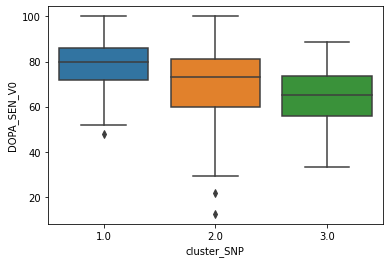

In [77]:
boxplot=sns.boxplot(data=df1,x="cluster_SNP",y="DOPA_SEN_V0")
fig=boxplot.get_figure()
fig.savefig('Boxplot_dopa_clusterSNP.jpg')

Clust1=df1[df1.loc[:,'cluster_SNP']==1.0]['DOPA_SEN_V0'].dropna().values
Clust2=df1[df1.loc[:,'cluster_SNP']==2.0]['DOPA_SEN_V0'].dropna().values
Clust3=df1[df1.loc[:,'cluster_SNP']==3.0]['DOPA_SEN_V0'].dropna().values
fvalue,pvalue=stats.f_oneway(Clust1,Clust2,Clust3)
print("ANOVA",np.round(fvalue,4),np.round(pvalue,4))
fvalue,pvalue=stats.ttest_ind(Clust1,Clust2)
print("Cluster1 Vs Cluster2",np.round(fvalue,4),np.round(pvalue,4))
fvalue,pvalue=stats.ttest_ind(Clust1,Clust3)
print("Cluster1 Vs Cluster3",np.round(fvalue,4),np.round(pvalue,4))
fvalue,pvalue=stats.ttest_ind(Clust2,Clust3)
print("Cluster2 Vs Cluster3",np.round(fvalue,4),np.round(pvalue,4))


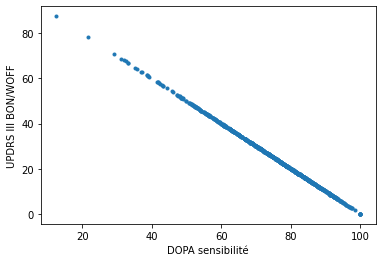

In [125]:
x=TARGET#df1.loc[:,'DOPA_SEN_V0'].values
y=(df1.loc[:,'UPDRS_III_BON_V0']/df1.loc[:,'UPDRS_III_WOFF_V0']).values*100
plt.plot(x,y,'.')
plt.xlabel("DOPA sensibilité")
plt.ylabel("UPDRS III BON/WOFF")
plt.savefig(os.path.join(STUDY_PATH,'UPDRES_BON_ON_WOFF_DOPA.jpeg'))

In [146]:
#test=Clean_DataFrame.drop(index=TARGET[TARGET<40].index.values,errors='ignore')
X=df1[df1.loc[:,'DIS_DUR_DIAG_V0']<500]
Y=TARGET[df1.loc[:,'DIS_DUR_DIAG_V0']<500]

df1=X[X.loc[:,'DIS_DUR_DIAG_V0']>-500]
TARGET=Y[X.loc[:,'DIS_DUR_DIAG_V0']>-500]

#print(df1.shape,df1.shape,Xbis.shape,Ybis.shape)
#g=sns.jointplot(x=Ybis, y=Xbis.loc[:,'DIS_DUR_DIAG_V0'],kind="reg")

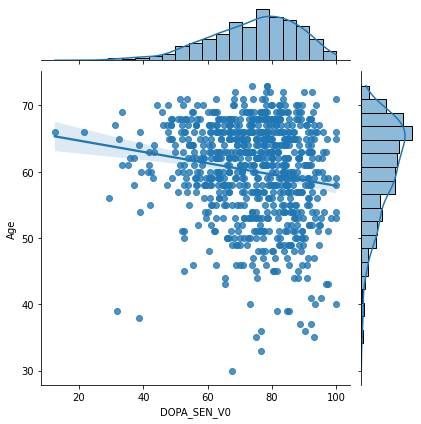

In [129]:
g=sns.jointplot(x=TARGET, y=df1.loc[:,'Age'],kind="reg")

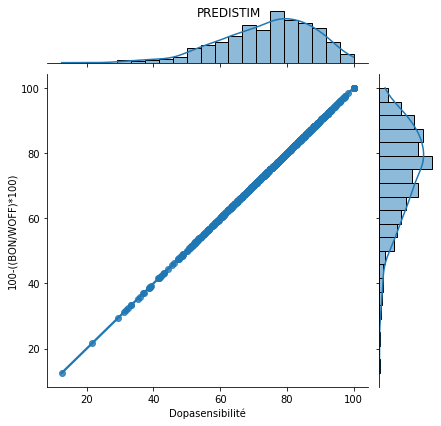

In [74]:
#g=sns.jointplot(x=df1.loc[:,'DOPA_SEN_V0'].values, y=100-((df1.loc[:,'UPDRS_III_BON_V0']/df1.loc[:,'UPDRS_III_WOFF_V0']).values*100),kind="reg")
g=sns.jointplot(x=TARGET, y=100-((df1.loc[:,'UPDRS_III_BON_V0']/df1.loc[:,'UPDRS_III_WOFF_V0']).values*100),kind="reg")
g.set_axis_labels(ylabel="100-((BON/WOFF)*100)",xlabel="Dopasensibilité")
plt.suptitle("PREDISTIM")
g.savefig(os.path.join(STUDY_PATH,'DopaVsBonWoff.jpeg'))
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df1.loc[:,'DOPA_SEN_V0'].values,(df1.loc[:,'UPDRS_III_BON_V0']/df1.loc[:,'UPDRS_III_WOFF_V0']).values*100)
#print(slope, intercept, r_value, p_value, std_err)

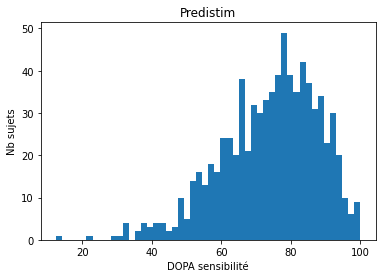

In [61]:
#plt.hist(df1.loc[:,'DOPA_SEN_V0'],50)
plt.hist(TARGET,50)
plt.xlabel("DOPA sensibilité")
plt.ylabel("Nb sujets")
plt.title("Predistim")
plt.savefig(os.path.join(STUDY_PATH,'Distribution_dopa_Predistim.jpeg'))

In [26]:
dfGnP = pd.read_csv(os.path.join(STUDY_PATH,'GnP_Dopa.csv'),sep=";")
dfGnP.columns

Index(['MDSUPDRSIII_OFF_W0', 'MDSUPDRSIII_ON_W0', 'Dopasensibilité',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')

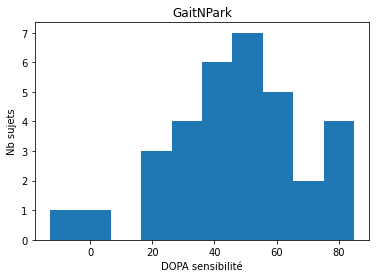

In [27]:
plt.hist(dfGnP.loc[:,'Dopasensibilité'])
plt.xlabel("DOPA sensibilité")
plt.ylabel("Nb sujets")
plt.title("GaitNPark")
plt.savefig(os.path.join(STUDY_PATH,'Distribution_dopa_GAitNPark.jpeg'))

<AxesSubplot:xlabel='MDSUPDRSIII_ON_W0', ylabel='MDSUPDRSIII_OFF_W0'>

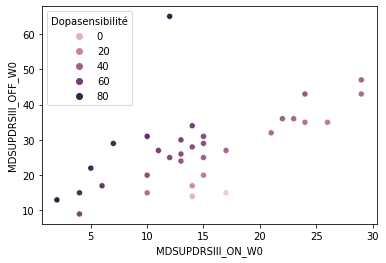

In [28]:
sns.scatterplot(x='MDSUPDRSIII_ON_W0',y='MDSUPDRSIII_OFF_W0',hue='Dopasensibilité',data=dfGnP)
#plt.savefig(os.path.join(STUDY_PATH,'UPDRES_WOFF_BON_DOPA.jpeg'))

Text(0, 0.5, 'UPDRS III ON/OFF')

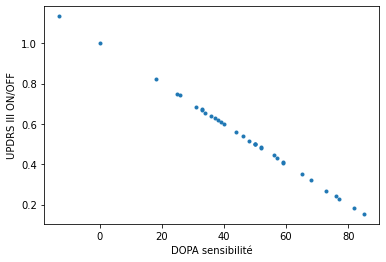

In [29]:
x=dfGnP.loc[:,'Dopasensibilité'].values
y=(dfGnP.loc[:,'MDSUPDRSIII_ON_W0']/dfGnP.loc[:,'MDSUPDRSIII_OFF_W0']).values
plt.plot(x,y,'.')
plt.xlabel("DOPA sensibilité")
plt.ylabel("UPDRS III ON/OFF")

In [112]:
df1.iloc[:,0:20].corrwith(df1['DOPA_SEN_V0'])

KeyError: 'DOPA_SEN_V0'

In [87]:
# Define parameters grid
lambda1 = (10.0 ** np.arange(-3,3.01, 0.2)) # 23 possible values for lambda
#alpha = np.arange(0, 1, 0.05) # 20 possible values for alpha
alpha=np.r_[np.arange(0.0, 0.3, 0.02), np.arange(0.3, 0.7, 0.1), np.arange(0.7, 0.99, 0.02)]

# Define model parameters
model = 'lm'  # linear model
penalization = 'sgl'  # sparse group lasso penalization
parallel = True # Code executed in parallel
error_type = 'MSE'  # Error measuremente considered. MSE stands for Mean Squared Error. #MAE MDAE QRE
print(lambda1,alpha)

[1.000e-03 1.585e-03 2.512e-03 3.981e-03 6.310e-03 1.000e-02 1.585e-02
 2.512e-02 3.981e-02 6.310e-02 1.000e-01 1.585e-01 2.512e-01 3.981e-01
 6.310e-01 1.000e+00 1.585e+00 2.512e+00 3.981e+00 6.310e+00 1.000e+01
 1.585e+01 2.512e+01 3.981e+01 6.310e+01 1.000e+02 1.585e+02 2.512e+02
 3.981e+02 6.310e+02 1.000e+03] [0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.4  0.5  0.6  0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84 0.86
 0.88 0.9  0.92 0.94 0.96 0.98]


In [114]:
MX_DEMO=df1.columns[0:4]
print(len(MX_DEMO),MX_DEMO)
MX_CLI=df1.columns[4:19]
print(len(MX_CLI),MX_CLI)
MX_BIO=df1.columns[19:30]
print(len(MX_BIO))
MX_T1=[col for col in df1.columns if col.startswith('3DT1')]
print(len(MX_T1))
MX_T2=[col for col in df1.columns if col.startswith('R2')]
print(len(MX_T2))
MX_QSM=[col for col in df1.columns if col.startswith('QSM')]
print(len(MX_QSM))

4 Index(['Age', 'DIS_DUR_DIAG_V0', 'BMI', 'Sexe'], dtype='object')
15 Index(['LEDD_TOT_V0', 'UPDRS_III_WOFF_V0', 'UPDRS_TOT_OFF_V0', 'HY_OFF_V0',
       'UPDRS_I _V0', 'UPDRS_II_OFF_V0', 'UPDRS_II_ON_V0', 'UPDRS_III_BON_V0',
       'UPDRS_IV _V0', 'UPDRS_TOT_ON_V0', 'HY_ON_V0', 'SE_ON_V0', 'SE_OFF_V0',
       'MoCA_TOT _V0', 'PDQ39_TOT_V0'],
      dtype='object')
11
360
360
360


In [115]:
MX_BIO

Index(['SNP_ACSL4', 'SNP_GPx4', 'cluster_SNP', 'Selenium', 'Ferritin ', 'GPx ',
       'NFL ', '4HNE ', 'TNFalpha ', 'IL6', 'AlphaSyn '],
      dtype='object')

In [116]:
MX_CLI
for COL in MX_CLI:
    if "OFF" in COL:
        MX_CLI=MX_CLI.drop(COL)
MX_CLI        

Index(['LEDD_TOT_V0', 'UPDRS_I _V0', 'UPDRS_II_ON_V0', 'UPDRS_III_BON_V0',
       'UPDRS_IV _V0', 'UPDRS_TOT_ON_V0', 'HY_ON_V0', 'SE_ON_V0',
       'MoCA_TOT _V0', 'PDQ39_TOT_V0'],
      dtype='object')

In [91]:
filter_col=[col for col in df1.columns if col.endswith('_Thalamus')]
print(len(filter_col))
filter_col

72


['3DT1_10Percentile_Thalamus',
 '3DT1_90Percentile_Thalamus',
 '3DT1_Energy_Thalamus',
 '3DT1_Entropy_Thalamus',
 '3DT1_InterquartileRange_Thalamus',
 '3DT1_Kurtosis_Thalamus',
 '3DT1_Median_Thalamus',
 '3DT1_Minimum_Thalamus',
 '3DT1_Range_Thalamus',
 '3DT1_RootMeanSquared_Thalamus',
 '3DT1_Skewness_Thalamus',
 '3DT1_Uniformity_Thalamus',
 '3DT1_Variance_Thalamus',
 '3DT1_Autocorrelation_Thalamus',
 '3DT1_ClusterProminence_Thalamus',
 '3DT1_Contrast_Thalamus',
 '3DT1_Correlation_Thalamus',
 '3DT1_InverseVariance_Thalamus',
 '3DT1_JointAverage_Thalamus',
 '3DT1_JointEnergy_Thalamus',
 '3DT1_JointEntropy_Thalamus',
 '3DT1_MCC_Thalamus',
 '3DT1_MaximumProbability_Thalamus',
 '3DT1_SumSquares_Thalamus',
 'R2_10Percentile_Thalamus',
 'R2_90Percentile_Thalamus',
 'R2_Energy_Thalamus',
 'R2_Entropy_Thalamus',
 'R2_InterquartileRange_Thalamus',
 'R2_Kurtosis_Thalamus',
 'R2_Median_Thalamus',
 'R2_Minimum_Thalamus',
 'R2_Range_Thalamus',
 'R2_RootMeanSquared_Thalamus',
 'R2_Skewness_Thalamus',

filter_col=[col for col in df1.columns if col.startswith('QSM_Correlation')]
print(len(filter_col))
filter_col

In [95]:
df1.loc[:,df1.columns[df1.columns.str.startswith('R2_Median_Thalamus')]].dropna().shape

(430, 1)

(array([ 1.,  0.,  7., 11., 31., 56., 72., 58., 45., 33., 37., 35., 14.,
        10.,  8.,  4.,  1.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([22.294, 22.891, 23.488, 24.085, 24.682, 25.279, 25.876, 26.473,
        27.071, 27.668, 28.265, 28.862, 29.459, 30.056, 30.653, 31.25 ,
        31.847, 32.444, 33.042, 33.639, 34.236, 34.833, 35.43 , 36.027,
        36.624, 37.221, 37.818, 38.415, 39.012, 39.61 , 40.207, 40.804,
        41.401, 41.998, 42.595, 43.192, 43.789, 44.386, 44.983, 45.58 ,
        46.178, 46.775, 47.372, 47.969, 48.566, 49.163, 49.76 , 50.357,
        50.954, 51.551, 52.149]),
 <BarContainer object of 50 artists>)

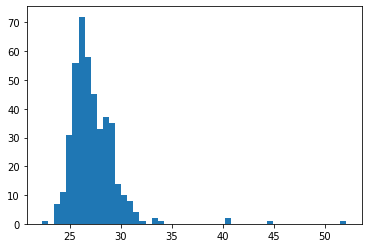

In [41]:
plt.hist(df1.loc[:,df1.columns[df1.columns.str.startswith('R2_Median_Thalamus')]].dropna().values.ravel(),bins=50)

In [42]:
tmp=df1.corr()['DOPA_SEN_V0']
for ind,col in zip(tmp,df1.columns):
    if ((ind < -0.1) or (ind > 0.1)):
        print(ind,col)

-0.1606120638028679 Age
0.13555211923443072 Centre
1.0 DOPA_SEN_V0
-0.22295384294210582 UPDRS_II_ON_V0
-0.8244353139700978 UPDRS_III_BON_V0
-0.5320809504023042 UPDRS_TOT_ON_V0
-0.3090471978054038 HY_ON_V0
0.25761980335057094 SE_ON_V0
-0.11413058759384395 PDQ39_TOT_V0
-0.33828831332016324 cluster_SNP
0.14571019706036592 Selenium
0.121724296924945 3DT1_Skewness_Ventricules
0.10652660128004483 3DT1_ClusterProminence_Caudate
0.10349692609311714 3DT1_Contrast_Caudate
-0.10269660833508674 3DT1_Autocorrelation_Putamen
0.10249018421008686 3DT1_Contrast_Putamen
0.10305123821005707 3DT1_10Percentile_Thalamus
-0.18497917158791535 3DT1_Range_Thalamus
0.10468471705530129 3DT1_Skewness_Thalamus
0.13401585751385775 3DT1_Uniformity_Thalamus
-0.1126189933374787 3DT1_Autocorrelation_Thalamus
0.1239280561195598 3DT1_Correlation_Thalamus
0.10069035600758139 3DT1_Skewness_Globus_pallidus
-0.1114687449238896 3DT1_Autocorrelation_Globus_pallidus
-0.10335316848913287 3DT1_Range_Hippocampus
0.10068609777371178

# ETUDE de la dopa par centre

In [43]:
df1.groupby(['Centre'])['DOPA_SEN_V0'].describe()

,count,mean,std,min,25%,50%,75%,max
Centre,,,,,,,,
1,63.0,74.371429,14.814372,31.9,65.650,76.50,85.050,97.5
2,88.0,67.420455,16.366121,12.5,55.750,69.60,79.300,96.0
4,14.0,82.292857,8.947235,67.2,75.800,84.95,89.000,93.2
5,16.0,69.893750,10.419883,52.9,63.025,67.95,79.325,90.9
6,88.0,73.802273,14.161864,33.3,68.500,75.45,84.225,100.0
7,98.0,76.314286,11.981954,39.0,69.400,77.80,85.225,97.3
8,42.0,79.683333,12.241511,52.5,71.325,83.10,87.800,100.0
9,24.0,73.470833,13.236855,50.0,62.200,73.35,83.250,93.2
10,40.0,67.877500,16.555447,29.3,54.825,72.45,80.700,92.6


/home/romain/.local/lib/python3.7/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_ydensity : Removed 49 rows containing non-finite values.
/home/romain/.local/lib/python3.7/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_boxplot : Removed 49 rows containing non-finite values.


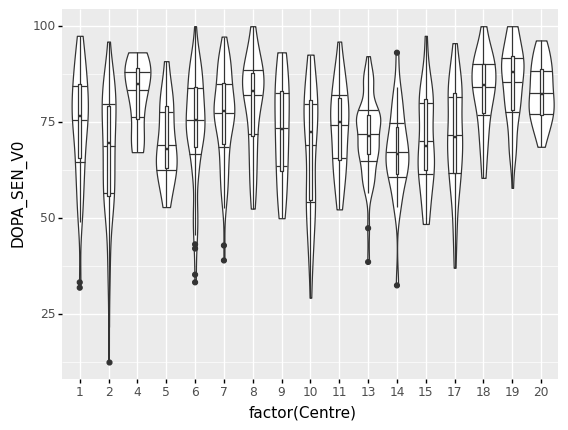

In [48]:
liste_struct=['DOPA_SEN_V0']
for struct in liste_struct: 
    group='factor(Centre)'
    plot=p9.ggplot(df1,p9.aes(x=group, y=struct)) + p9.geom_violin(draw_quantiles=[0.25,0.5,0.75])+p9.geom_boxplot(width=.1)
    plot.draw()

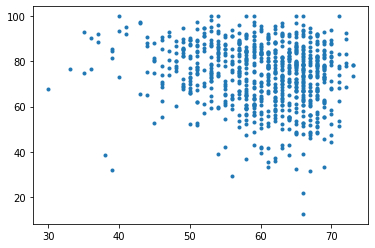

In [97]:
plt.plot(df1['Age'],df1['DOPA_SEN_V0'],".")

In [98]:
Clean_DataFrame_Model1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,560.0,59.944643,7.647334,30.000000,55.00000,61.000000,66.000000,73.000000
DIS_DUR_DIAG_V0,560.0,13.382143,84.448270,3.000000,7.00000,9.000000,12.000000,2006.000000
BMI,560.0,26.060273,16.558734,15.622619,22.09317,24.691358,27.755102,356.426821
Sexe,560.0,1.346429,0.476257,1.000000,1.00000,1.000000,2.000000,2.000000
Centre,560.0,10.041071,6.216726,1.000000,6.00000,8.000000,17.000000,20.000000
DOPA_SEN_V0,560.0,74.760000,13.633199,12.500000,65.95000,76.700000,85.125000,100.000000
UPDRS_I _V0,560.0,11.350000,5.611036,0.000000,7.00000,11.000000,15.000000,32.000000
UPDRS_II_ON_V0,560.0,6.114286,5.737659,0.000000,2.00000,5.000000,9.000000,50.000000
UPDRS_III_BON_V0,560.0,10.791071,7.589013,0.000000,5.00000,9.000000,15.000000,51.000000
UPDRS_IV _V0,560.0,8.407143,3.677804,0.000000,6.00000,8.000000,11.000000,22.000000


In [101]:
Clean_DataFrame_Model1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, 01011BB to 20029DA
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               560 non-null    float64
 1   DIS_DUR_DIAG_V0   560 non-null    int64  
 2   BMI               560 non-null    float64
 3   Sexe              560 non-null    float64
 4   Centre            560 non-null    int64  
 5   DOPA_SEN_V0       560 non-null    float64
 6   UPDRS_I _V0       560 non-null    int64  
 7   UPDRS_II_ON_V0    560 non-null    float64
 8   UPDRS_III_BON_V0  560 non-null    float64
 9   UPDRS_IV _V0      560 non-null    int64  
 10  UPDRS_TOT_ON_V0   560 non-null    float64
 11  HY_ON_V0          560 non-null    float64
 12  SE_ON_V0          560 non-null    float64
 13  MoCA_TOT _V0      560 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 65.6+ KB


In [118]:
list_Mod=[]
Clean_DataFrame_Model1=pd.concat([df1.loc[:,MX_DEMO],df1.loc[:,MX_CLI]],ignore_index=True,axis=1).dropna()
Clean_DataFrame_Model1.columns=list(MX_DEMO)+list(MX_CLI)
list_Mod.append("DEMO_CLI")

Clean_DataFrame_Model2=pd.concat([df1.loc[:,MX_DEMO],df1.loc[:,MX_CLI],df1.loc[:,MX_T1]],ignore_index=True,axis=1).dropna()
Clean_DataFrame_Model2.columns=list(MX_DEMO)+list(MX_CLI)+list(MX_T1)
list_Mod.append("DEMO_CLI_T1")

Clean_DataFrame_Model3=pd.concat([df1.loc[:,MX_DEMO],df1.loc[:,MX_CLI],df1.loc[:,MX_T1],df1.loc[:,MX_T2]],ignore_index=True,axis=1).dropna()
Clean_DataFrame_Model3.columns=list(MX_DEMO)+list(MX_CLI)+list(MX_T1)+list(MX_T2)
list_Mod.append("DEMO_CLI_T1_T2")

Clean_DataFrame_Model4=pd.concat([df1.loc[:,MX_DEMO],df1.loc[:,MX_CLI],df1.loc[:,MX_T1],df1.loc[:,MX_T2],df1.loc[:,MX_QSM]],ignore_index=True,axis=1).dropna()
Clean_DataFrame_Model4.columns=list(MX_DEMO)+list(MX_CLI)+list(MX_T1)+list(MX_T2)+list(MX_QSM)
list_Mod.append("DEMO_CLI_T1_T2_QSM")

Clean_DataFrame_Model5=pd.concat([df1.loc[:,MX_DEMO],df1.loc[:,MX_CLI],df1.loc[:,MX_T1],df1.loc[:,MX_T2],df1.loc[:,MX_QSM],df1.loc[:,MX_BIO]],ignore_index=True,axis=1).dropna()
Clean_DataFrame_Model5.columns=list(MX_DEMO)+list(MX_CLI)+list(MX_T1)+list(MX_T2)+list(MX_QSM)+list(MX_BIO)
list_Mod.append("DEMO_CLI_T1_T2_QSM_BIO")

Clean_DataFrame_Model6=pd.concat([df1.loc[:,MX_DEMO],df1.loc[:,MX_CLI],df1.loc[:,MX_BIO]],ignore_index=True,axis=1).dropna()
Clean_DataFrame_Model6.columns=list(MX_DEMO)+list(MX_CLI)+list(MX_BIO)
list_Mod.append("DEMO_CLI_BIO")

Clean_DataFrame_Model7=pd.concat([df1.loc[:,MX_DEMO],df1.loc[:,MX_CLI],df1.loc[:,MX_BIO],df1.loc[:,MX_T1]],ignore_index=True,axis=1).dropna()
Clean_DataFrame_Model7.columns=list(MX_DEMO)+list(MX_CLI)+list(MX_BIO)+list(MX_T1)
list_Mod.append("DEMO_CLI_BIO_T1")

In [119]:
group_index_1=np.concatenate((np.ones(len(MX_DEMO)),2*np.ones(len(MX_CLI))),axis=0)

nbGroup=15
nbEltPerGroup=24
group_index_2=np.ones(nbEltPerGroup*nbGroup)
for grp in np.arange(nbGroup):
    group_index_2=group_index_2+np.concatenate((np.zeros((nbEltPerGroup*nbGroup)-(nbEltPerGroup*grp)),np.ones(nbEltPerGroup*grp)),axis=0)
group_index_2=np.concatenate((np.ones(len(MX_CLI)),group_index_2+np.ones(len(group_index_2))),axis=0)
group_index_2=np.concatenate((np.ones(len(MX_DEMO)),group_index_2+np.ones(len(group_index_2))),axis=0)
print(len(group_index_2))

nbGroup=30
nbEltPerGroup=24
group_index_3=np.ones(nbEltPerGroup*nbGroup)
for grp in np.arange(nbGroup):
    group_index_3=group_index_3+np.concatenate((np.zeros((nbEltPerGroup*nbGroup)-(nbEltPerGroup*grp)),np.ones(nbEltPerGroup*grp)),axis=0)
group_index_3=np.concatenate((np.ones(len(MX_CLI)),group_index_3+np.ones(len(group_index_3))),axis=0)
group_index_3=np.concatenate((np.ones(len(MX_DEMO)),group_index_3+np.ones(len(group_index_3))),axis=0)
print(len(group_index_3))

nbGroup=45
nbEltPerGroup=24
group_index_4=np.ones(nbEltPerGroup*nbGroup)
for grp in np.arange(nbGroup):
    group_index_4=group_index_4+np.concatenate((np.zeros((nbEltPerGroup*nbGroup)-(nbEltPerGroup*grp)),np.ones(nbEltPerGroup*grp)),axis=0)
group_index_4=np.concatenate((np.ones(len(MX_CLI)),group_index_4+np.ones(len(group_index_4))),axis=0)
group_index_4=np.concatenate((np.ones(len(MX_DEMO)),group_index_4+np.ones(len(group_index_4))),axis=0)
print(len(group_index_4))

nbGroup=45
nbEltPerGroup=24
group_index_5=np.ones(nbEltPerGroup*nbGroup)
for grp in np.arange(nbGroup):
    group_index_5=group_index_5+np.concatenate((np.zeros((nbEltPerGroup*nbGroup)-(nbEltPerGroup*grp)),np.ones(nbEltPerGroup*grp)),axis=0)
group_index_5=np.concatenate((np.ones(len(MX_CLI)),group_index_5+np.ones(len(group_index_5))),axis=0)
group_index_5=np.concatenate((np.ones(len(MX_DEMO)),group_index_5+np.ones(len(group_index_5))),axis=0)
group_index_5=np.concatenate((group_index_5,(nbGroup+3)*np.ones(len(MX_BIO))),axis=0)
print(len(group_index_5))

group_index_6=np.concatenate((np.ones(len(MX_DEMO)),2*np.ones(len(MX_CLI)),3*np.ones(len(MX_BIO))),axis=0)
print(len(group_index_6))

nbGroup=15
nbEltPerGroup=24
group_index_7=np.ones(nbEltPerGroup*nbGroup)
for grp in np.arange(nbGroup):
    group_index_7=group_index_7+np.concatenate((np.zeros((nbEltPerGroup*nbGroup)-(nbEltPerGroup*grp)),np.ones(nbEltPerGroup*grp)),axis=0)
group_index_7=np.concatenate((np.ones(len(MX_CLI)),group_index_7+np.ones(len(group_index_7))),axis=0)
group_index_7=np.concatenate((np.ones(len(MX_DEMO)),group_index_7+np.ones(len(group_index_7))),axis=0)
group_index_7=np.concatenate((np.ones(len(MX_BIO)),group_index_7+np.ones(len(group_index_7))),axis=0)
print(len(group_index_7))

374
734
1094
1105
25
385


# Boucles sur les modèles

DEMO_CLI
n = 560
nbVariable =  14


/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccur

 Minimum cross validation error was 2.753193788287993e-07.
 Optimal parameter values:
  Lambda: 0.001
  Alpha: 0.9800000000000002
MSE =  [0.]
r2  =  1.0
0 75.0 Age
6 14.0 UPDRS_I _V0
****************************************
DEMO_CLI_T1
n = 218
nbVariable =  374


/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccur

 Minimum cross validation error was 2.8602539318516706e-07.
 Optimal parameter values:
  Lambda: 0.001
  Alpha: 0.9800000000000002
MSE =  [0.]
r2  =  1.0
0 74.0 Age
6 14.0 UPDRS_I _V0
****************************************
DEMO_CLI_T1_T2
n = 209
nbVariable =  734


/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccur

 Minimum cross validation error was 2.8010426870097916e-07.
 Optimal parameter values:
  Lambda: 0.001
  Alpha: 0.9800000000000002
MSE =  [0.]
r2  =  1.0
0 74.0 Age
6 14.0 UPDRS_I _V0
****************************************
DEMO_CLI_T1_T2_QSM
n = 127
nbVariable =  1094


/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccur

 Minimum cross validation error was 2.8173393481419247e-07.
 Optimal parameter values:
  Lambda: 0.001
  Alpha: 0.9800000000000002
MSE =  [0.]
r2  =  1.0
0 75.0 Age
6 13.0 UPDRS_I _V0
****************************************
DEMO_CLI_T1_T2_QSM_BIO
n = 80
nbVariable =  1105


/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.


2023-03-16 20:13:19,867 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details
2023-03-16 20:13:52,889 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details
2023-03-16 20:14:03,512 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details
2023-03-16 20:14:16,738 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details


/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.


2023-03-16 20:15:30,540 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details
2023-03-16 20:18:54,736 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details
2023-03-16 20:19:05,926 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details
2023-03-16 20:19:21,645 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details
2023-03-16 20:19:32,330 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details
2023-03-16 20:19:44,663 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details
2023-03-16 20:19:54,508 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details
2023-03-16 20:20:02,642 - WARNING - Default solver failed. Using alte

/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.


2023-03-16 20:24:40,758 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details


/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.


2023-03-16 20:26:11,060 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details


/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.


2023-03-16 20:28:27,623 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details
2023-03-16 20:28:56,910 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details
2023-03-16 20:29:17,285 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details
2023-03-16 20:29:27,705 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details
2023-03-16 20:29:54,431 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details
2023-03-16 20:30:04,982 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details
2023-03-16 20:30:15,703 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details
2023-03-16 20:30:27,747 - WARNING - Default solver failed. Using alte

/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccur

2023-03-16 20:33:29,161 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details


/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.


 Minimum cross validation error was 3.0297675774336614e-07.
 Optimal parameter values:
  Lambda: 0.001
  Alpha: 0.9800000000000002
MSE =  [0.]
r2  =  1.0
0 75.0 Age
6 14.0 UPDRS_I _V0
****************************************
DEMO_CLI_BIO
n = 306
nbVariable =  25


/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccur

 Minimum cross validation error was 2.851354593869262e-07.
 Optimal parameter values:
  Lambda: 0.001
  Alpha: 0.9800000000000002
MSE =  [0.]
r2  =  1.0
0 74.0 Age
6 14.0 UPDRS_I _V0
****************************************
DEMO_CLI_BIO_T1
n = 127
nbVariable =  385


/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccur

2023-03-16 20:39:00,651 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details
 Minimum cross validation error was 3.1891212234082944e-07.
 Optimal parameter values:
  Lambda: 0.001
  Alpha: 0.9800000000000002


/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.


MSE =  [0.]
r2  =  1.0
0 72.0 Age
6 14.0 UPDRS_I _V0
****************************************


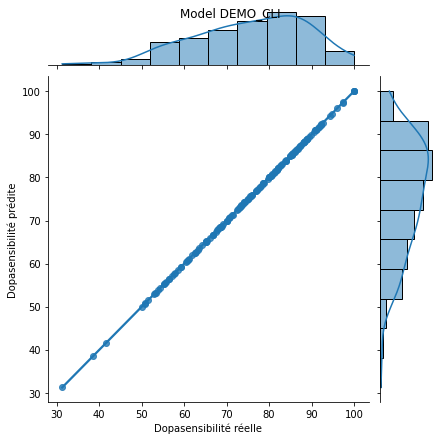

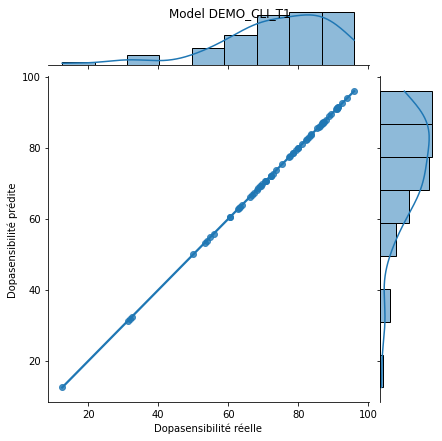

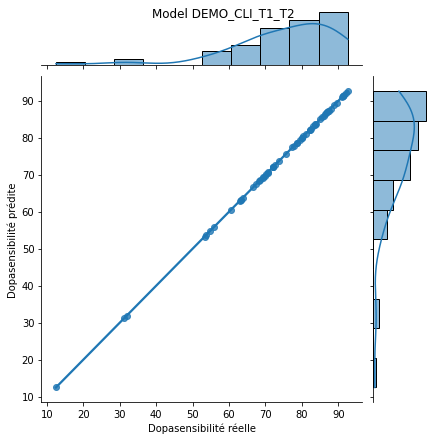

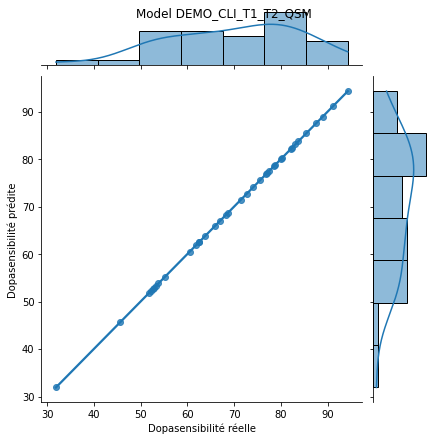

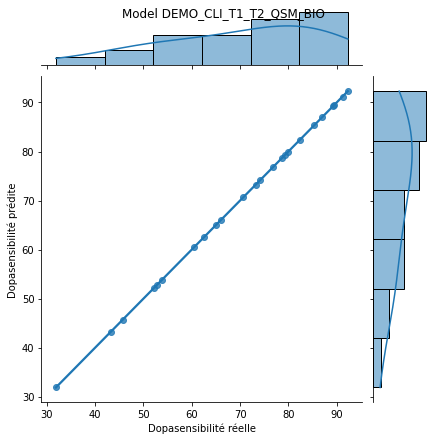

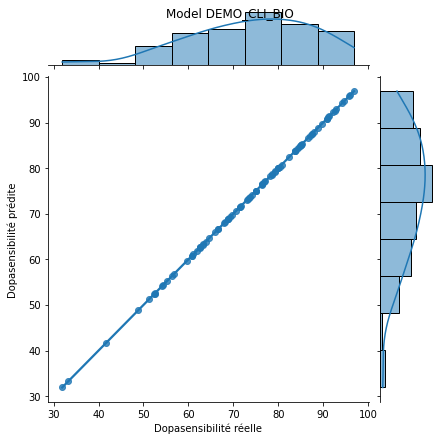

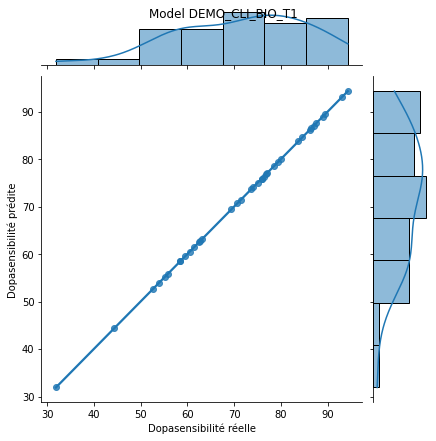

In [51]:
for Clean_DataFrame,group_index,ModUsed in zip([Clean_DataFrame_Model1,Clean_DataFrame_Model2,Clean_DataFrame_Model3,Clean_DataFrame_Model4,Clean_DataFrame_Model5,Clean_DataFrame_Model6,Clean_DataFrame_Model7],[group_index_1,group_index_2,group_index_3,group_index_4,group_index_5,group_index_6,group_index_7],list_Mod):
    print(ModUsed)
    data_scaler = skl_pp.StandardScaler().fit(Clean_DataFrame.values)
    data_rescaled = data_scaler.transform(Clean_DataFrame.values)
    y=np.transpose(TARGET.loc[Clean_DataFrame.index].values)
    x=data_rescaled
    
    x=np.delete(x,np.argwhere(np.isnan(y)),axis=0)
    y=np.delete(y,np.argwhere(np.isnan(y)),axis=0)
    
    print("n =",len(y))
    print("nbVariable = ",x.shape[1])
    cv_class = asgl.CV(model=model,penalization=penalization,lambda1=lambda1, alpha=alpha,nfolds=5, error_type=error_type, parallel=parallel, random_state=99)

    error = cv_class.cross_validation(x=x, y=y, group_index=group_index)
    error = np.mean(error, axis=1)
    minimum_error_idx = np.argmin(error)
    optimal_parameters = cv_class.retrieve_parameters_value(minimum_error_idx)
    optimal_lambda = optimal_parameters.get('lambda1')
    optimal_alpha = optimal_parameters.get('alpha')

    print(f' Minimum cross validation error was {error[minimum_error_idx]}.\n Optimal parameter values:\n  Lambda: {optimal_lambda}\n  Alpha: {optimal_alpha}')

    asgl_model = asgl.ASGL(model=model, penalization=penalization, lambda1=optimal_lambda, alpha=optimal_alpha)
    train_idx, test_idx = asgl.train_test_split(nrows=x.shape[0], train_pct=0.7, random_state=1)
    asgl_model.fit(x=x[train_idx, :], y=y[train_idx], group_index=group_index)
    final_beta_solution = asgl_model.coef_[0]
    
    final_prediction = asgl_model.predict(x_new=x[test_idx, :])
    final_error = asgl.error_calculator(y_true=y[test_idx], prediction_list=final_prediction, error_type="MSE")    

    print('MSE = ', np.round(final_error,2))
    g = sns.jointplot(x=y[test_idx], y=final_prediction[0],kind="reg")
    g.set_axis_labels(ylabel="Dopasensibilité prédite",xlabel="Dopasensibilité réelle")
    g.fig.suptitle("Model "+ModUsed)
    g.savefig(os.path.join(STUDY_PATH,ModUsed+'_F.jpeg'))
    r2 = r2_score(y[test_idx],final_prediction[0])
    print('r2  = ', np.round(r2,2))
    for cpt,val in enumerate(final_beta_solution):
        if (val>1):
            print(cpt,np.round(val),Clean_DataFrame.columns[cpt])
    print("****************************************")

# Avec un lambda et un alpha fixe 

DEMO_CLI
n = 387
nbVariable =  14
Min Max Entrainement :  41.5 100.0
Min Max test :  41.7 96.9
MSE =  [60.5]


/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.


r2  =  0.59
0 74.0 Age
9 1.0 UPDRS_TOT_ON_V0
****************************************
DEMO_CLI_T1
n = 141
nbVariable =  374
Min Max Entrainement :  44.4 94.4
Min Max test :  43.2 96.0
MSE =  [116.82]
r2  =  0.39
0 73.0 Age
9 1.0 UPDRS_TOT_ON_V0
49 2.0 3DT1_Uniformity_Caudate
150 1.0 3DT1_Correlation_Hippocampus
293 1.0 3DT1_Contrast_FLASH_STh
****************************************
DEMO_CLI_T1_T2
n = 140
nbVariable =  734
Min Max Entrainement :  44.4 96.0
Min Max test :  43.2 93.1
MSE =  [103.]
r2  =  0.46
0 73.0 Age
9 2.0 UPDRS_TOT_ON_V0
128 2.0 3DT1_JointAverage_Globus_pallidus
204 1.0 3DT1_MaximumProbability_FLASH_RN
386 1.0 R2_Variance_Ventricules
684 1.0 R2_MaximumProbability_MP2RAGE_STR
****************************************
DEMO_CLI_T1_T2_QSM
n = 92
nbVariable =  1094
Min Max Entrainement :  43.2 94.4
Min Max test :  51.9 92.6
MSE =  [119.57]
r2  =  0.15
0 75.0 Age
227 1.0 3DT1_MCC_FLASH_SN
343 1.0 3DT1_InverseVariance_CingulaireAnt
745 1.0 QSM_Uniformity_Ventricules
868 2.0 

/home/romain/.local/lib/python3.7/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.


r2  =  0.67
0 74.0 Age
17 4.0 Selenium
****************************************
DEMO_CLI_BIO_T1
n = 114
nbVariable =  385
Min Max Entrainement :  43.2 96.0
Min Max test :  52.5 94.4
MSE =  [115.6]
r2  =  0.09
0 73.0 Age
3 1.0 Sexe
14 1.0 SNP_ACSL4
17 2.0 Selenium
25 2.0 3DT1_10Percentile_Ventricules
48 2.0 3DT1_SumSquares_Ventricules
60 2.0 3DT1_Uniformity_Caudate
138 2.0 3DT1_InverseVariance_Globus_pallidus
144 2.0 3DT1_SumSquares_Globus_pallidus
157 1.0 3DT1_Variance_Hippocampus
185 1.0 3DT1_Correlation_Amigdala
307 1.0 3DT1_JointAverage_FLASH_STh
****************************************


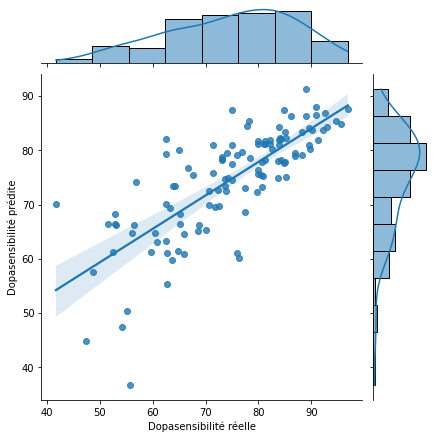

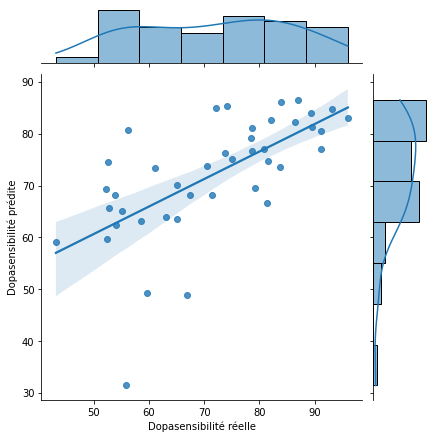

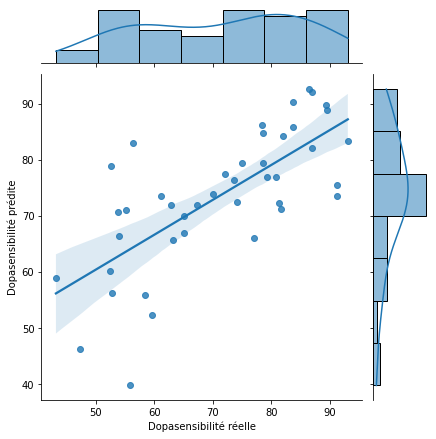

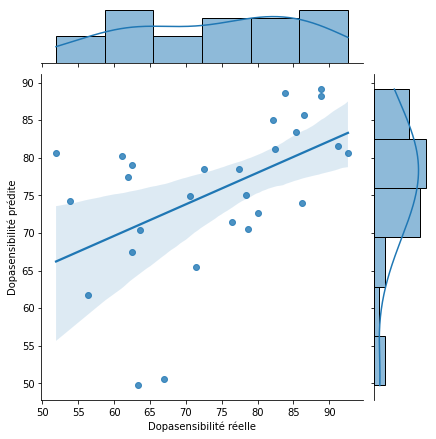

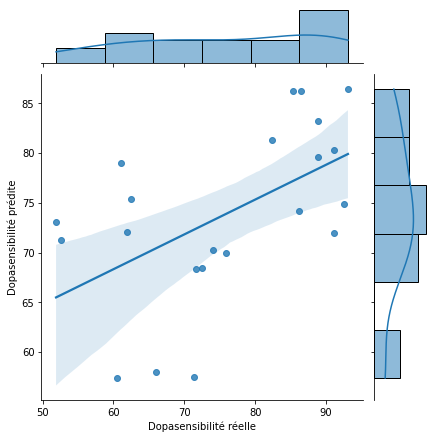

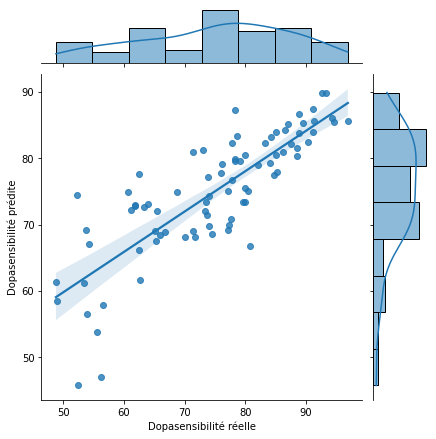

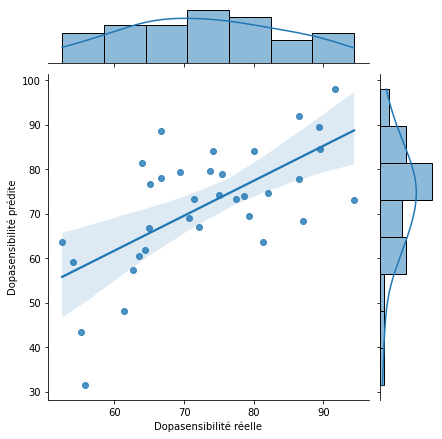

In [124]:
for Clean_DataFrame,group_index,ModUsed in zip([Clean_DataFrame_Model1,Clean_DataFrame_Model2,Clean_DataFrame_Model3,Clean_DataFrame_Model4,Clean_DataFrame_Model5,Clean_DataFrame_Model6,Clean_DataFrame_Model7],[group_index_1,group_index_2,group_index_3,group_index_4,group_index_5,group_index_6,group_index_7],list_Mod):
#for Clean_DataFrame,group_index,ModUsed in zip([Clean_DataFrame_Model1],[group_index_1],list_Mod):
    print(ModUsed)
    NewDF=Clean_DataFrame.drop(index=TARGET[TARGET<40].index.values,errors='ignore')
    
    data_scaler = skl_pp.StandardScaler().fit(NewDF.values)
    data_rescaled = data_scaler.transform(NewDF.values)
    y=np.transpose(TARGET.loc[NewDF.index].values)
    x=data_rescaled
    
    x=np.delete(x,np.argwhere(np.isnan(y)),axis=0)
    y=np.delete(y,np.argwhere(np.isnan(y)),axis=0)
    
    print("n =",len(y))
    print("nbVariable = ",x.shape[1])
    optimal_lambda=0.4
    optimal_alpha=0.98
    
    asgl_model = asgl.ASGL(model=model, penalization=penalization, lambda1=optimal_lambda, alpha=optimal_alpha)
    train_idx, test_idx = asgl.train_test_split(nrows=x.shape[0], train_pct=0.7, random_state=1)
    asgl_model.fit(x=x[train_idx, :], y=y[train_idx], group_index=group_index)
    final_beta_solution = asgl_model.coef_[0]
    
    final_prediction = asgl_model.predict(x_new=x[test_idx, :])
    final_error = asgl.error_calculator(y_true=y[test_idx], prediction_list=final_prediction, error_type="MSE")    
    print("Min Max Entrainement : ",np.min(y[train_idx]),np.max(y[train_idx]))
    print("Min Max test : ",np.min(y[test_idx]),np.max(y[test_idx]))
    
    print('MSE = ', np.round(final_error,2))
    g = sns.jointplot(x=y[test_idx], y=final_prediction[0],kind="reg")
    g.set_axis_labels(ylabel="Dopasensibilité prédite",xlabel="Dopasensibilité réelle")
    #g.fig.suptitle("Model "+ModUsed)
    g.savefig(os.path.join(STUDY_PATH,ModUsed+'DopaSup40.jpeg'))
    r2 = r2_score(y[test_idx],final_prediction[0])
    print('r2  = ', np.round(r2,2))
    for cpt,val in enumerate(final_beta_solution):
        if (val>1):
            print(cpt,np.round(val),Clean_DataFrame.columns[cpt])
    print("****************************************")

In [121]:
for Clean_DataFrame,group_index in zip([Clean_DataFrame_Model1,Clean_DataFrame_Model2,Clean_DataFrame_Model3,Clean_DataFrame_Model4,Clean_DataFrame_Model5,Clean_DataFrame_Model6,Clean_DataFrame_Model7],[group_index_1,group_index_2,group_index_3,group_index_4,group_index_5,group_index_6,group_index_7]):
    print(len(Clean_DataFrame),Clean_DataFrame.columns)
    print(len(group_index))

395 Index(['Age', 'DIS_DUR_DIAG_V0', 'BMI', 'Sexe', 'LEDD_TOT_V0', 'UPDRS_I _V0',
       'UPDRS_II_ON_V0', 'UPDRS_III_BON_V0', 'UPDRS_IV _V0', 'UPDRS_TOT_ON_V0',
       'HY_ON_V0', 'SE_ON_V0', 'MoCA_TOT _V0', 'PDQ39_TOT_V0'],
      dtype='object')
14
145 Index(['Age', 'DIS_DUR_DIAG_V0', 'BMI', 'Sexe', 'LEDD_TOT_V0', 'UPDRS_I _V0',
       'UPDRS_II_ON_V0', 'UPDRS_III_BON_V0', 'UPDRS_IV _V0', 'UPDRS_TOT_ON_V0',
       ...
       '3DT1_ClusterProminence_FrontalSup', '3DT1_Contrast_FrontalSup',
       '3DT1_Correlation_FrontalSup', '3DT1_InverseVariance_FrontalSup',
       '3DT1_JointAverage_FrontalSup', '3DT1_JointEnergy_FrontalSup',
       '3DT1_JointEntropy_FrontalSup', '3DT1_MCC_FrontalSup',
       '3DT1_MaximumProbability_FrontalSup', '3DT1_SumSquares_FrontalSup'],
      dtype='object', length=374)
374
144 Index(['Age', 'DIS_DUR_DIAG_V0', 'BMI', 'Sexe', 'LEDD_TOT_V0', 'UPDRS_I _V0',
       'UPDRS_II_ON_V0', 'UPDRS_III_BON_V0', 'UPDRS_IV _V0', 'UPDRS_TOT_ON_V0',
       ...
       'R2_C

In [123]:
os.path.join(STUDY_PATH,ModUsed+'DopaSup40.jpeg')

'/NAS/deathrow/protocoles/predistim/DEMO_CLI_BIO_T1DopaSup40.jpeg'

In [24]:
for Clean_DataFrame,group_index,ModUsed in zip([Clean_DataFrame_Model1,Clean_DataFrame_Model2,Clean_DataFrame_Model3,Clean_DataFrame_Model4,Clean_DataFrame_Model5,Clean_DataFrame_Model6,Clean_DataFrame_Model7],[group_index_1,group_index_2,group_index_3,group_index_4,group_index_5,group_index_6,group_index_7],list_Mod):
    print(ModUsed)
    data_scaler = skl_pp.StandardScaler().fit(Clean_DataFrame.values)
    data_rescaled = data_scaler.transform(Clean_DataFrame.values)
    y=np.transpose(TARGET.loc[Clean_DataFrame.index].values)
    x=data_rescaled
    
    x=np.delete(x,np.argwhere(np.isnan(y)),axis=0)
    y=np.delete(y,np.argwhere(np.isnan(y)),axis=0)
    print(np.min(y),np.max(y))
    

DEMO_CLI
12.5 100.0
DEMO_CLI_T1
12.5 96.0
DEMO_CLI_T1_T2
12.5 96.0
DEMO_CLI_T1_T2_QSM
31.9 94.4
DEMO_CLI_T1_T2_QSM_BIO
31.9 94.4
DEMO_CLI_BIO
12.5 98.4
DEMO_CLI_BIO_T1
12.5 96.0


In [51]:
TARGET[TARGET<40].index.values
#MyDf=Clean_DataFrame_Model1;
#for SUBJ in  :
#    MyDf.loc[SUBJ]

array(['01020VM', '01060PC', '02010DP', '02048LN', '02059WC', '02079MZ',
       '02083SG', '02084DI', '06003LP', '06021RJ', '07084BJ', '10005LM',
       '10023MM', '13051TG', '14029DC', '17022PG', '17043MG'],
      dtype=object)